In [59]:
import re
import numpy as np

def myParser(x):
    x = x.strip()
    x = x.lower()
    x = re.split('[^a-z]', x)
    x = [st for st in x if len(st) > 0]
    return x

myFile = open("test1.txt", 'r')
source = myFile.readlines()
myFile.close()
source = map(myParser, source)
mydict = {}
for sentence in source:
    for word in sentence:
        if (not (word in mydict.keys())):
            mydict.update([(word, len(mydict))])
data = np.zeros((len(source),len(mydict)))
for word in mydict:
    for ind, sentence in enumerate(source):
       data[ind, mydict[word]] = sentence.count(word)
    
from scipy.spatial.distance import cosine
data = map(lambda x: cosine(data[0], x), data)
minmin = data[1]
preminmin = data[2]
for dist in data[1:]:
    if(dist < minmin):
        preminmin = minmin
        minmin = dist
        continue
    if(dist < preminmin):
        preminmin = dist
myFile = open("submission-1.txt", "w")
myFile.write(str(data.index(minmin))+ " " + str(data.index(preminmin)))
myFile.close()

Populating the interactive namespace from numpy and matplotlib
[ 3.32512949 -0.06531159 -0.00760104]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


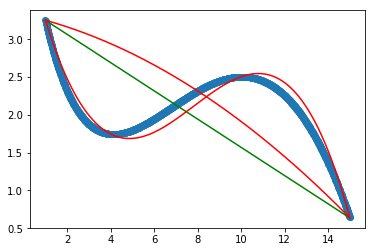

In [99]:
import math
import numpy
import scipy
import matplotlib as plt

%pylab inline

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)


A = np.array([[1.0, 1.0], [1.0,15.0]])
b = np.array([f(1.0), f(15.0)])
x = scipy.linalg.solve(A, b)


x_start = np.arange(1, 15, 0.01)
y1 = map(f, x_start)
y2 = x[0]+x[1]*x_start

plt.plot(x_start, y1, "o", x_start, y2, "g")

A1 = np.array([[1.0, 1.0, 1.0], [1.0,8.0, 64.0], [1.0, 15.0, 225.0]])
b1 = np.array([f(1.0), f(8.0), f(15.0)])
x1 = scipy.linalg.solve(A1, b1)
print(x1)
y3 = x1[0]+x1[1]*x_start+x1[2]*(x_start**2)
plt.plot(x_start, y3, "r")


A2 = np.array([[1.0, 1.0, 1.0, 1.0], [1.0,4.0, 16.0, 64.0], [1.0, 10.0, 100.0, 1000.0], [1.0, 15.0, 225.0, 3375.0]])
b2 = np.array([f(1.0), f(4.0), f(10.0), f(15.0)])
x2 = scipy.linalg.solve(A2, b2)
print(x2)
y4 = x2[0]+x2[1]*x_start+x2[2]*(x_start**2) + x2[3]*(x_start**3)
plt.plot(x_start, y4, "r")
plt.savefig("test.jpg")

In [96]:
print A1.dot(x1)-b1
myFile = open("submission-2.txt", "w")
myStr = " ".join(map(lambda t: str(t), x2))
myFile.write(myStr)
myFile.close()

[ 0.00000000e+00  0.00000000e+00 -1.66533454e-16]


In [94]:
print x2.dot([1, 1, 1, 1])-f(1)
print x2.dot([1, 4, 16, 64])-f(4.0)
print x2.dot([1, 10, 100, 1000])-f(10.0)
print x2.dot([1, 15, 225, 3375])-f(15.0)

2.220446049250313e-16
-1.0701695334073036
2.6645352591003757e-15
-0.24994015289802274
